In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [474]:
loan=pd.read_csv('loan.csv')

C:\Users\agarw\AppData\Local\Temp\ipykernel_12872\765846796.py:1: DtypeWarning: Columns (25,32,34,44,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  loan=pd.read_csv('loan.csv')


In [475]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [476]:
loan['#_of_records'] = loan.index # Added an addiitonal column to see no of records in df which we will use later in our code

In [477]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,#_of_records
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4


In [478]:
loan['#_of_records'].count()

39717

In [479]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       '#_of_records'],
      dtype='object', length=112)

In [480]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
#_of_records                      0
Length: 112, dtype: int64

In [481]:
loan.shape

(39717, 112)

In [482]:
loan.dropna(how='all' ,axis=1, inplace=True)

In [483]:
'''
Earlier we had 112 columns and now we have 62 columns
'''
loan.shape # so now we have removed columns with empty values


(39717, 62)

In [484]:
# No of Accounts who defaulted (Charged off)

df_charged_off = loan.loc[loan['loan_status'] == 'Charged Off']

In [485]:
# No of Accounts who didn not defaulted ( Not Charged off)

df_notcharged_off = loan.loc[loan['loan_status'] != 'Charged Off']

In [486]:
# function to plot chart

def category_split(df):
    ax= (df).value_counts().plot.bar()
    ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.f')
    plt.show()
    
    ax = ((df).value_counts()/ len(df)*100).plot.bar()
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.f')
    plt.show()

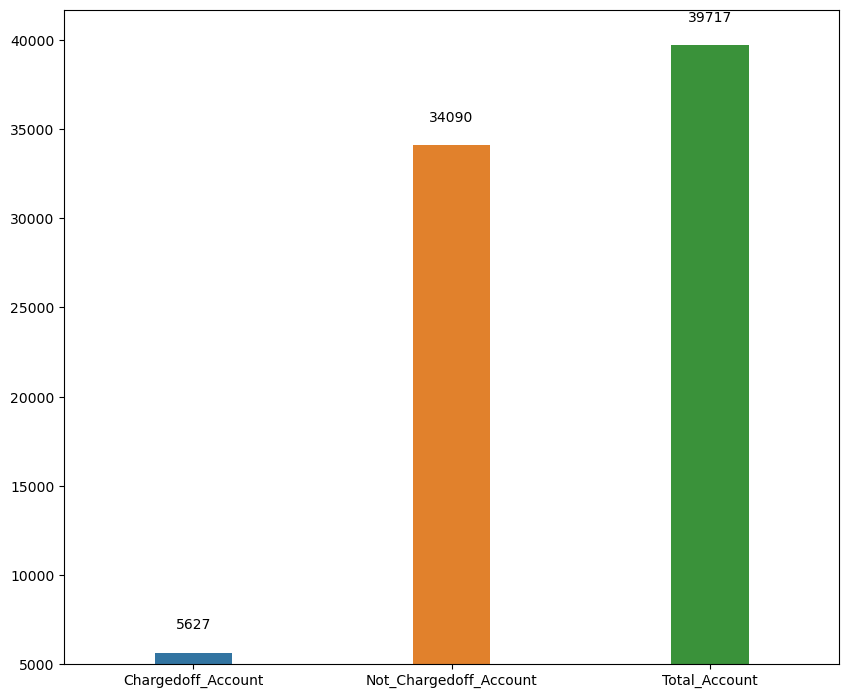

In [487]:
# Plotting count of Accounts which fall in Category of Chargedoff,Not_Chargedoff,Total_Account
import numpy as np
x_axis = np.array(['Chargedoff_Account','Not_Chargedoff_Account','Total_Account'])
y_axis= np.array([df_charged_off['#_of_records'].count(),df_notcharged_off['#_of_records'].count(),loan['#_of_records'].count()])


import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots (figsize=(10,8.5))
barchart= sns.barplot(x=x_axis, y=y_axis, ax= ax, width = 0.3)

barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.ylim(5000, None)
plt.show()

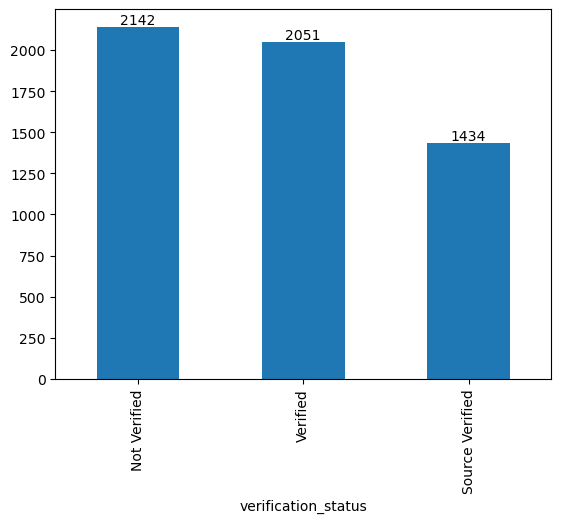

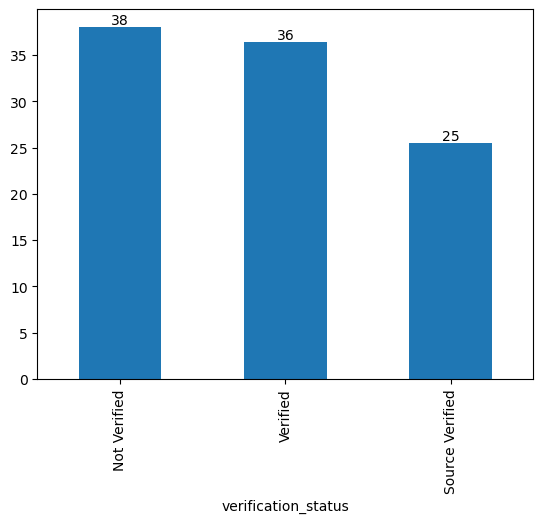

'\nAccounts not verified were the largest contributor in Charged off Accounts\n'

In [488]:
# Verification status captured for Charged off accounts

category_split(df_charged_off['verification_status'])

'''
Accounts not verified were the largest contributor in Charged off Accounts
'''

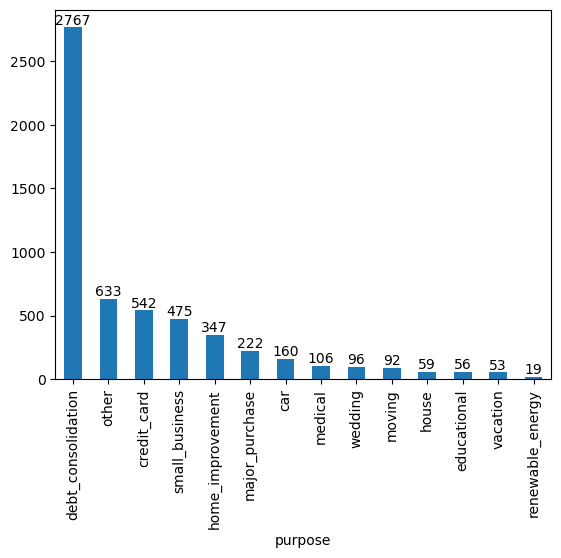

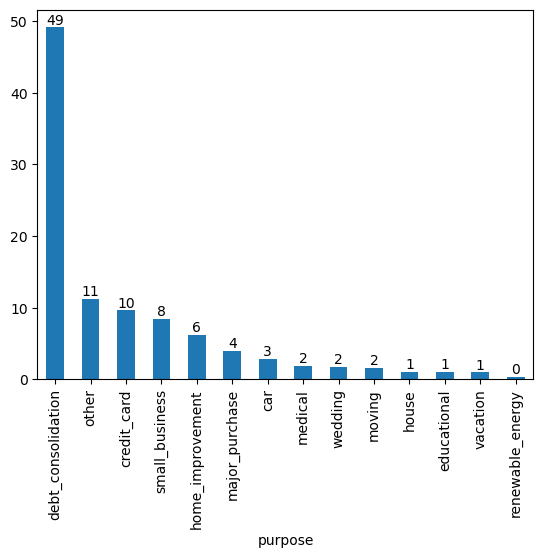

'\nTop 3 categories were Debt consolidation, Other and Credit_Card, so we have to be extra careful for customers who take \nloan for Debt consolidation and Credit_Card (59% contribution)\n'

In [489]:
# Purpose of loan captured for Charged off accounts

category_split(df_charged_off['purpose'])


'''
Top 3 categories were Debt consolidation, Other and Credit_Card, so we have to be extra careful for customers who take 
loan for Debt consolidation and Credit_Card (59% contribution)
'''

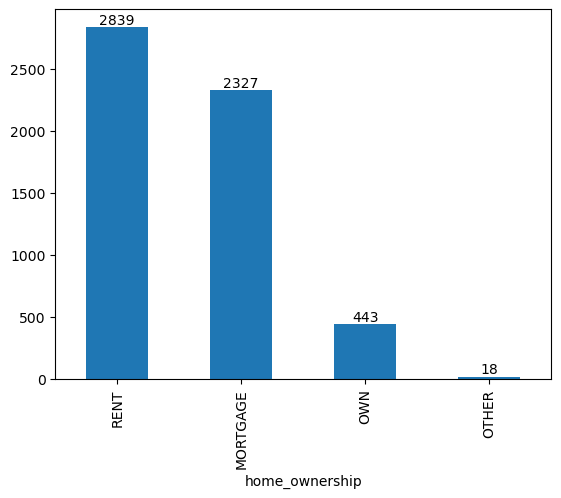

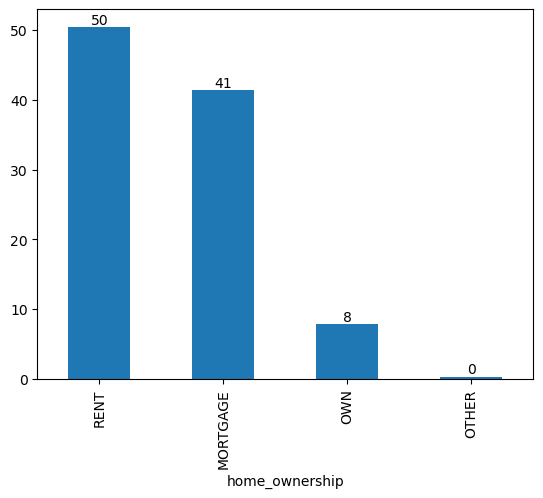

'\nOutput suggests that Maximum customers (91%) who defaulted were either on Rent on their House was no Mortgage - hence Banks\nhave to be extra careful while giving loans to this segment\n'

In [490]:
# Home Ownership Category captured of customers who defaulted

category_split(df_charged_off['home_ownership'])

'''
Output suggests that Maximum customers (91%) who defaulted were either on Rent on their House was no Mortgage - hence Banks
have to be extra careful while giving loans to this segment
'''

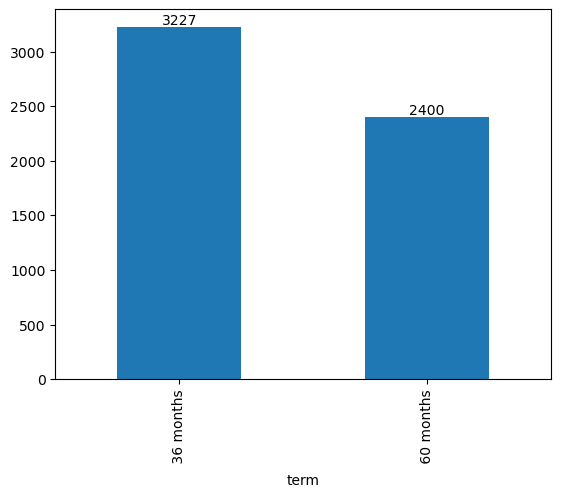

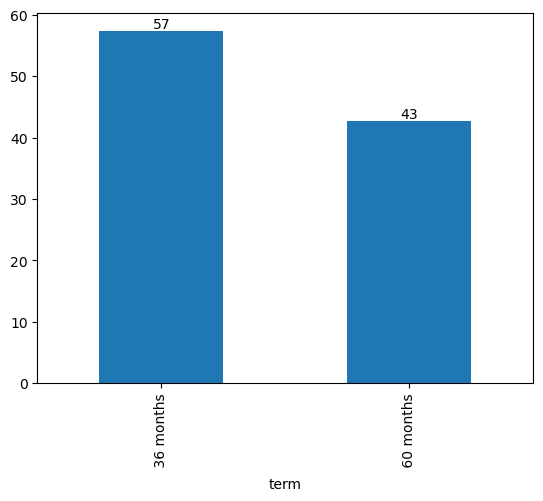

'\nOutput suggests that loans of lesser tenure got defualted the most by 14%\n'

In [491]:
# Tenurity of loan  captured of customers who defaulted

category_split(df_charged_off['term'])

'''
Output suggests that loans of lesser tenure got defualted the most by 14%
'''

C:\Users\agarw\AppData\Local\Temp\ipykernel_12872\3630823381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charged_off['annual_inc']=pd.cut(df_charged_off['annual_inc'],bins=bins, labels= labels)


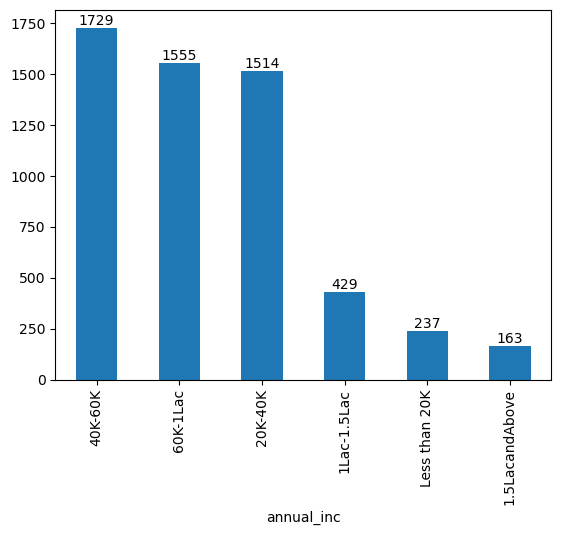

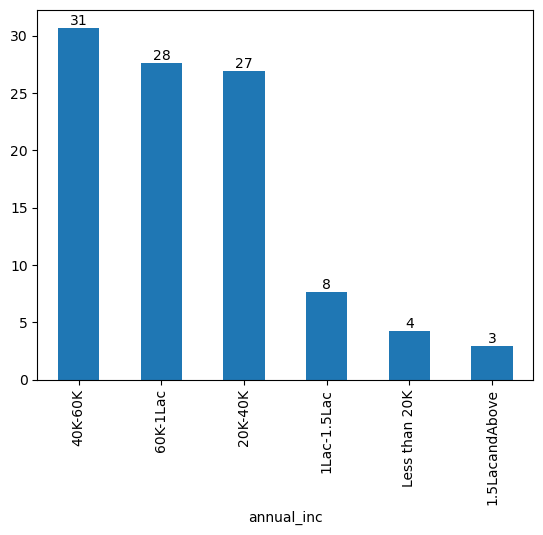

'\nOutput suggests that Finance Company should reconsider Yearly income criteria while processing loans and avoid giving loans \nto Consumers if their Yearly Income is less than 1 Lac\n'

In [492]:
# Annual income bucket of loan defualters

bins = [0, 20000, 40000, 60000, 100000, 150000,np.inf]
labels = ['Less than 20K','20K-40K', '40K-60K','60K-1Lac','1Lac-1.5Lac','1.5LacandAbove']
df_charged_off['annual_inc']=pd.cut(df_charged_off['annual_inc'],bins=bins, labels= labels)

category_split(df_charged_off['annual_inc'])
'''
Output suggests that Finance Company should reconsider Yearly income criteria while processing loans and avoid giving loans 
to Consumers if their Yearly Income is less than 1 Lac
'''